<a href="https://colab.research.google.com/github/krishnaprasad20/Projects/blob/main/Credit_card_fraud_detection/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Credit card fraud detection is challenging due to the highly imbalanced nature of transaction data. This project aims to build a machine learning classification model to accurately identify fraudulent transactions using engineered behavioral features. Feature engineering was applied to create distance_ratio, high_price_ratio, online_chip, and risk_score. To handle class imbalance in the target variable, SMOTE was used. Multiple classification models were trained and evaluated to identify the most effective fraud detection model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/card_transdata.csv')

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.isnull().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
repeat_retailer,0
used_chip,0
used_pin_number,0
online_order,0
fraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

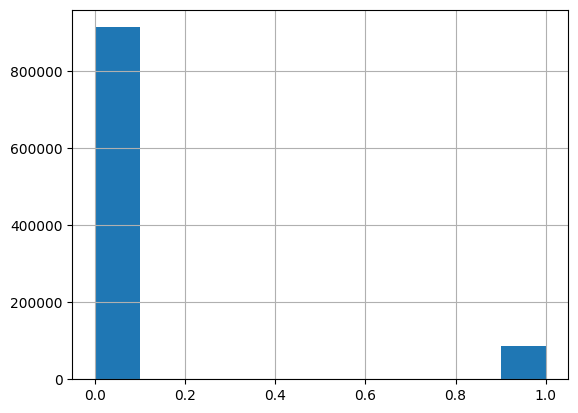

In [ ]:
df['fraud'].hist()

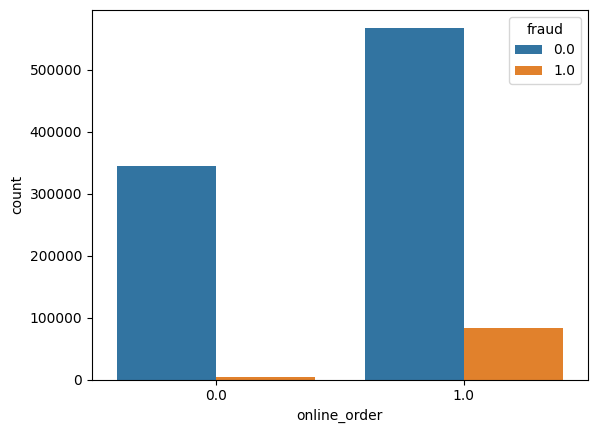

In [ ]:
sns.countplot(data=df, x='online_order', hue='fraud')
plt.show()

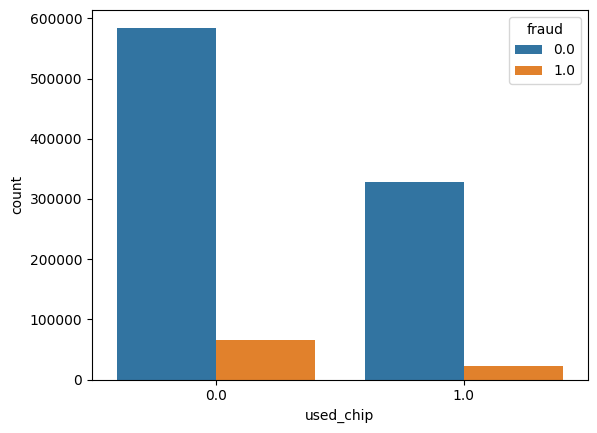

In [ ]:
sns.countplot(data=df, x='used_chip', hue='fraud')
plt.show()

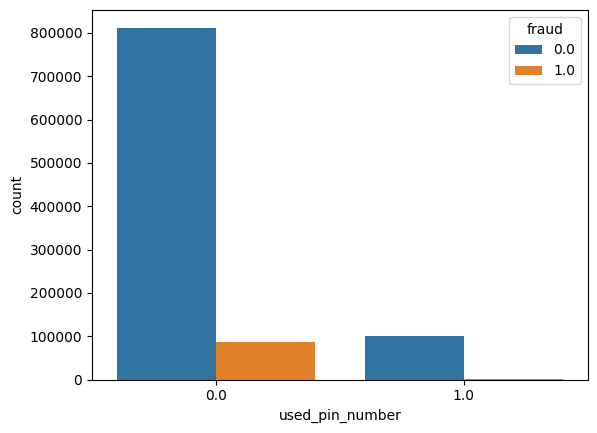

In [ ]:
sns.countplot(data=df, x='used_pin_number', hue='fraud')
plt.show()

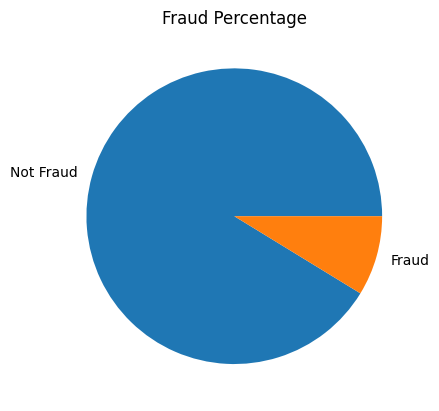

In [ ]:
fraud_counts = df['fraud'].value_counts()
plt.pie(
    fraud_counts,
    labels=['Not Fraud', 'Fraud'],
)
plt.title('Fraud Percentage')
plt.show()


In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


**Feature Engineering**

In [ ]:
df['distance_ratio'] = df['distance_from_home'] / (df['distance_from_last_transaction'] + 1)


In [ ]:
df['high_price_ratio'] = df['ratio_to_median_purchase_price'].apply(lambda x: 1 if x > 1.5 else 0)


In [ ]:
df['online_chip'] = df['online_order'] * df['used_chip']


In [ ]:
df['risk_score'] = df['distance_from_home'] * df['ratio_to_median_purchase_price']


droped columns:
distance_from_home,
distance_from_last_transaction,
ratio_to_median_purchase_price,
online_order,
used_chip


In [ ]:
df.drop(["distance_from_home",'distance_from_last_transaction','ratio_to_median_purchase_price',
         'online_order','used_chip'],axis="columns",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   repeat_retailer   1000000 non-null  float64
 1   used_pin_number   1000000 non-null  float64
 2   fraud             1000000 non-null  float64
 3   distance_ratio    1000000 non-null  float64
 4   high_price_ratio  1000000 non-null  int64  
 5   online_chip       1000000 non-null  float64
 6   risk_score        1000000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 53.4 MB


In [ ]:
df.head()

,repeat_retailer,used_pin_number,fraud,distance_ratio,high_price_ratio,online_chip,risk_score
0,1.0,0.0,0.0,44.143155,1,0.0,112.626835
1,1.0,0.0,0.0,9.212335,0,0.0,14.016316
2,1.0,0.0,0.0,2.820304,0,0.0,2.177529
3,1.0,0.0,0.0,0.340538,0,1.0,0.815107
4,1.0,0.0,0.0,28.210229,1,1.0,98.226167


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('fraud',axis=1)
y = df['fraud']

smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

df=pd.concat([X_resampled,y_resampled],axis=1)

<Axes: >

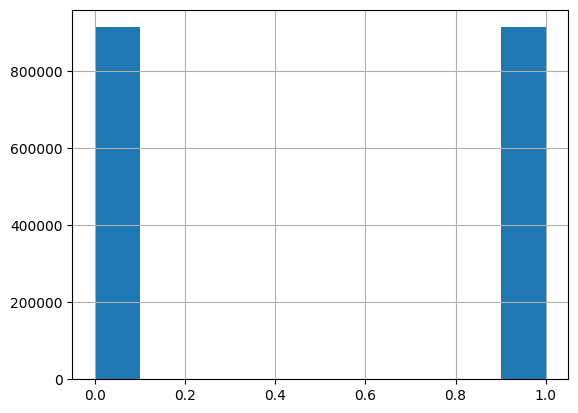

In [ ]:
df['fraud'].hist()

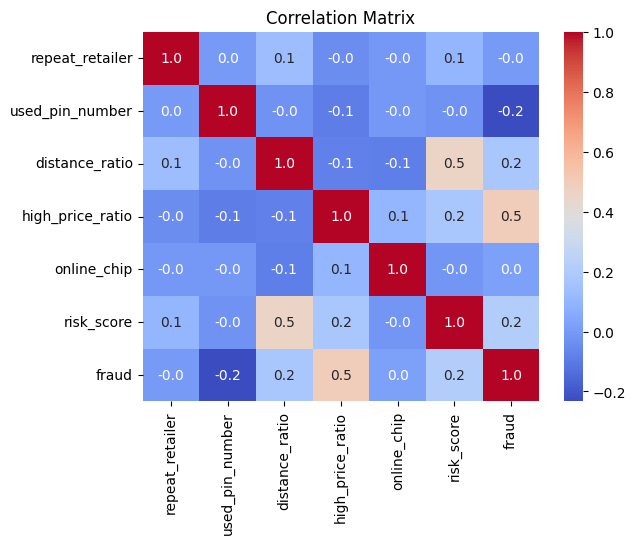

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

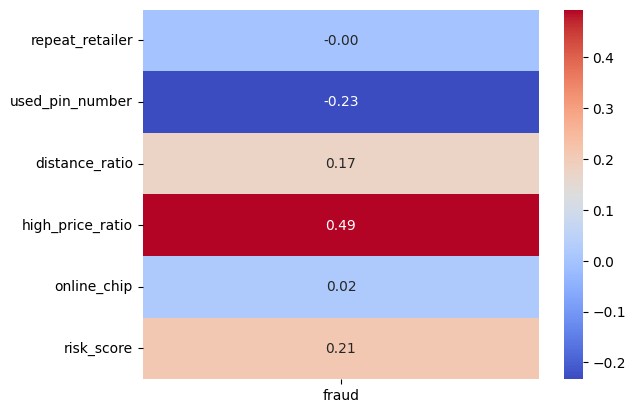

In [ ]:
fraud_corr = df.corr()['fraud']

fraud_corr = fraud_corr.drop('fraud')
sns.heatmap(fraud_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, annot_kws={'size': 10})
plt.show()

In [ ]:
df.drop(['online_chip','repeat_retailer'],axis=1,inplace=True)

<Axes: >

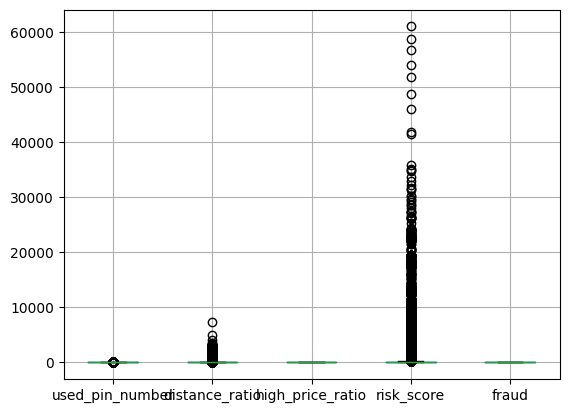

In [ ]:
df.boxplot()

In [ ]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col==exclude_column:
      continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

df_cleaned = remove_outliers_iqr(df,exclude_column='fraud')
df=df_cleaned


In [ ]:
df.shape

(1311195, 5)

In [ ]:
df.head()

,used_pin_number,distance_ratio,high_price_ratio,risk_score,fraud
1,0.0,9.212335,0,14.016316,0.0
2,0.0,2.820304,0,2.177529,0.0
3,0.0,0.340538,0,0.815107,0.0
4,0.0,28.210229,1,98.226167,0.0
5,0.0,0.391724,0,0.361823,0.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

features = ['used_pin_number','distance_ratio','high_price_ratio','risk_score']

scaler= MinMaxScaler()

scaled_data = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_data,columns=features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

X=df[['used_pin_number','distance_ratio','high_price_ratio','risk_score']]
y=df['fraud']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.82


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X=df[['used_pin_number','distance_ratio','high_price_ratio','risk_score']]
y=df['fraud']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.89


In [ ]:
from cycler import L
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X=df[['used_pin_number','distance_ratio','high_price_ratio','risk_score']]
y=df['fraud']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.86


In [ ]:
from cycler import L
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X=df[['used_pin_number','distance_ratio','high_price_ratio','risk_score']]
y=df['fraud']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=25,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.83


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X=df[['used_pin_number','distance_ratio','high_price_ratio','risk_score']]
y=df['fraud']

X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = RandomForestClassifier(
        n_estimators=100,
        max_depth=12,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features='log2',
        random_state=42

)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.88


# **Conclusion**

In this project, feature engineering and data balancing significantly improved fraud detection performance. Among Logistic Regression, Decision Tree, and Random Forest classifiers, the Random Forest model achieved the highest baseline accuracy of 0.89 after hyperparameter tuning. The results demonstrate that ensemble models combined with SMOTE are effective for detecting fraudulent transactions in imbalanced datasets.